In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
costData = pd.read_csv('costData.csv')
costData.head()

,Unnamed: 0,disasterNumber,obligationAmount,state,incidentType,declarationTitle,incidentBeginDate
0,0,3345,904490.14,WV,Severe Storms,SEVERE STORMS,2012-06-29T22:30:00.000Z
1,1,3346,842464.67,OH,Severe Storms,SEVERE STORMS,2012-06-29T22:00:00.000Z
2,2,3347,1409793.92,LA,Hurricane,TROPICAL STORM ISAAC,2012-08-26T00:00:00.000Z
3,3,3348,253189.73,MS,Hurricane,TROPICAL STORM ISAAC,2012-08-26T00:00:00.000Z
4,4,3349,0.00,MD,Hurricane,HURRICANE SANDY,2012-10-26T15:36:00.000Z


In [3]:
incidentCost = costData[['obligationAmount', 'incidentType']]
incidentCost.head()

,obligationAmount,incidentType
0,904490.14,Severe Storms
1,842464.67,Severe Storms
2,1409793.92,Hurricane
3,253189.73,Hurricane
4,0.00,Hurricane


In [4]:
incidentCost = pd.get_dummies(incidentCost)
incidentCost.head()

,obligationAmount,incidentType_Coastal Storm,incidentType_Earthquake,incidentType_Fire,incidentType_Flood,incidentType_Hurricane,incidentType_Mud/Landslide,incidentType_Severe Ice Storm,incidentType_Severe Storms,incidentType_Snow,incidentType_Tornado,incidentType_Volcano
0,904490.14,0,0,0,0,0,0,0,1,0,0,0
1,842464.67,0,0,0,0,0,0,0,1,0,0,0
2,1409793.92,0,0,0,0,1,0,0,0,0,0,0
3,253189.73,0,0,0,0,1,0,0,0,0,0,0
4,0.00,0,0,0,0,1,0,0,0,0,0,0


In [10]:
incidentCost.rename(columns={'incidentType_Coastal Storm': 'coastal_storm',
                            'incidentType_Earthquake':'earthquake',
                            'incidentType_Hurricane':'hurrincane',
                            'incidentType_Fire':'fire',
                            'incidentType_Flood':'flood',
                            'incidentType_Mud/Landslide':'mud_landslide',
                            'incidentType_Severe Ice Storm':'severe_ice_storm',
                            'incidentType_Snow':'snow',
                            'incidentType_Tornado':'tornado',
                            'incidentType_Volcano':'volcano',
                            'incidentType_Severe Storms':'severe_storms',
                            'obligationAmount':'fema_payout'},inplace=True)
incidentCost

,fema_payout,coastal_storm,earthquake,fire,flood,hurrincane,mud_landslide,severe_ice_storm,severe_storms,snow,tornado,volcano
0,904490.14,0,0,0,0,0,0,0,1,0,0,0
1,842464.67,0,0,0,0,0,0,0,1,0,0,0
2,1409793.92,0,0,0,0,1,0,0,0,0,0,0
3,253189.73,0,0,0,0,1,0,0,0,0,0,0
4,0.00,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
329,78140.23,0,0,0,0,0,0,0,1,0,0,0
330,2500.00,0,0,0,0,0,0,0,1,0,0,0
331,10000.00,0,0,0,0,0,0,0,0,0,1,0
332,10000.00,0,0,0,1,0,0,0,0,0,0,0


In [12]:
X = incidentCost[['coastal_storm','earthquake','fire','flood','hurrincane','mud_landslide',
                   'severe_ice_storm','severe_storms','snow','tornado','volcano']]
y = incidentCost['fema_payout'].values.reshape(-1, 1)
print(X.shape,y.shape)

(334, 11) (334, 1)


In [14]:
# Split the data into training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [15]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [16]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [17]:
# Create a LinearRegression model and fit it to the scaled training data

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)


LinearRegression()

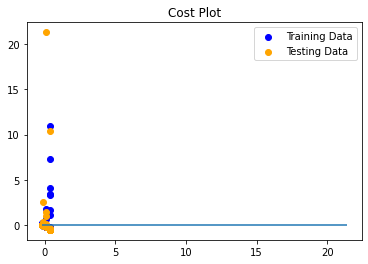

In [24]:
# Make predictions using a fitted model

predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), y_train_scaled - model.predict(X_train_scaled), c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), y_test_scaled - model.predict(X_test_scaled), c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Cost Plot")
plt.show()

In [19]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 6.8574296069288065, R2: -0.0010565376747480038
